## Discussion 1: Python, Pandas, and Matplotlib

<img src="pandas.jpeg" width="300"/>

Welcome to MS&E 125 Discussions! Discussions are an opportunity to get hands-on experience with material from lecture, as well as prepare you for completing the homework assignments. Completing the discussions is optional, and we will not be collecting them. *However*, we strongly encourage you to work through the discussions, as we feel that they are the best way to learn the material. Additionally, attending the discussion sections gives you the opportunity to get support from the course TAs as needed and help you stay on top of the material.

The goal is for each discussion notebook to be fully contained so that you can work through the discussions on your own. When completing a discussion, you should work through the whole notebook, reading all text components and running all code cells. Additionally, there will be some exercises in the notebook for you to complete to make sure you are understanding the material.

### Note on Discussion 0

We understand that students coming into the course will have a variety of backgrounds, including different levels of coding experience. For anyone who would like a refresher on basic coding fundamentals, including anyone new to the Python language, there is an extra discussion notebook called Discussion 0 which goes over basic Python principles that will be useful for this course. For any such people, we encourage you to first complete Discussion 0 before starting this Discussion.

#### **Google Colab**

All discussions and HWs in this class will use Google Colab. Colab is a tool to edit and run Jupyter notebooks online. What is a Jupyter Notebook? It's a file with a `.ipynb` extension that allows for text as well as code chunks that can be executed natively. They're a great tool for education as well as research!

Jupyter notebooks are organized into *cells*, which in a rectangular region containing text or code. *Text cells*, like this one, are written in Markdown, which is just free text with some extra features. For example, you can write math in Markdown using Latex, e.g. $x = 5$. *Code cells*, meanwhile, are cells which contain code (in this case, Python code). Adding a new cell is easy: click the (+ Code) below or above an existing cell for a new code cell, or (+ Markdown) for a new text cell. To run a cell, click the "Run" button in the top left of the cell, or simply Ctrl-Enter in the body of the cell. Text cells can be edited by double-clicking on the cell, and then "running" the cell after you are finished editing. More details are in Discussion 0.

#### **Copying Notebooks (important)**

When you clicked on the link to this discussion, it will open the Jupyter Notebook in Google Colab. However, the copy of the notebook that opens is the copy created by the course staff. If you go to save this notebook, you will be told that you need to make a copy of the notebook to your personal google drive in order to edit and run the notebook. Thus, at the beginning of each discussion and homework, you will need to **make a copy of the notebook to your personal Google Drive** by clicking File -> Save a copy in Drive. 

#### **Python**

This course will be using Python for all coding sections. Python is a high-level language that is great for statistics and data science. If you would like a review of Python fundamentals, please review Discussion 0.

We will start by importing some packages that we will be using in this discussion. You can think of a package as a collection of code that can be imported and used in your own code.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sets theme for plots
sns.set_theme()

Each of the packages above has a unique role to play for the data science ecosystem in Python. We will now explore each...

#### **NumPy**

NumPy is the basic building block for most data science packages in Python. The core data structure of NumPy is the ndarray: an N-dimensional array of values all of the same data type, or dtype. You might ask, why do we need NumPy and ndarrays when we can just use (nested) Python Lists instead? As you'll see through this course, ndarrays are more efficient and flexible than Python Lists, and NumPy provides a whole suite a tools that allows for easy and fast data manipulation.

Below is an example of creating an ndarray, and doing a basic operation, adding 1 to each element.

In [2]:
x = np.array([1, 2, 3, 4, 5])
x = x + 1
print(x, x.dtype)

[2 3 4 5 6] int64


Notice already one benefit of using NumPy: *broadcasting*. When we add 1 to the ndarray, it broadcasts the addition across the entire ndarray, unlike what would happen with the equivalent list (try it yourself!). Another major improvement with NumPy is *vectorization*, meaning the use of pre-defined operations on ndarrays opposed to performing the operation iteratively. See the following example:

In [3]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 4, 3, 2, 1])

# Fast vectorized operation
z = x + y
print(z)

# Slower iterative operation (don't do this!)
z = np.array([0, 0, 0, 0, 0])
for i in range(5):
  z[i] = x[i] + y[i]
print(z)

[6 6 6 6 6]
[6 6 6 6 6]


NumPy itself is a huge package with an enormous amount to explore. For now, we will move on to Pandas and matplotlib. But keep in mind that almost any operation you want to do to your data, you can find a function to do said operation in NumPy. NumPy documentation and Google are your friend!

**EXERCISE**: look up the documentation for `np.identity`, and use this function to create an ndarray of shape (10, 10) with 5 on the main diagonal and 0 elsewhere. 

In [3]:
# ANSWER
A = np.identity(10) * 5
A

array([[5., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 5., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 5., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 5., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 5., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 5., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 5., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 5., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 5., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 5.]])

#### **Pandas**

Pandas is a package built on top of NumPy used for reading, analyzing, and manipulating data. The core data structure in Pandas is the *dataframe*, which is a 2D table-like object which, unlike a 2D ndarray, can support a different data type for each column. This is ideal for storing real-world Excel-like data which may have columns of different dtypes, e.g. columns for age (int), weight (float), and city (string). Like NumPy, Pandas supports a giant collection of operations to easily and efficiently manipulate dataframes.

Pandas will be your primary tool for storing and manipulating data in this class and beyond. We will explore more about Pandas operations next week, but for now, we will show just how to read in data and briefly inspect the data. The below code will read in data about the titanic from a CSV file, and print out the head of the dataframe.

In [4]:
titanic_path = "https://raw.githubusercontent.com/stanford-policylab/mse125/31b8b50be0eafcb4c48a1ce3ca732556429a0824/week_1/titanic.csv"
df = pd.read_csv(titanic_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Notice that this data has columns of different data types. We can look at individual columns:

In [5]:
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

An individual column of a dataframe is called a *series*. As we can see in the print above, the series has a specific dtype. Since a dataframe is just a concatenation of series objects, with each series having its own dtype, a dataframe can easily store different dtypes for each column, as is often the case in real data. 

Like NumPy, Pandas has many operations to easily manipulate and analyze your data. For example:

In [ ]:
# Get the mean age
print(df["Age"].mean())

# The maximum age
print(df["Age"].max())

# Get the number of passengers of each sex
print(df["Sex"].value_counts())

29.69911764705882
14.526497332334042
80.0
male      577
female    314
Name: Sex, dtype: int64


#### **Pandas Subsetting**

Often you'll want to look at not an entire dataframe, but some subset of the dataframe. It is very easy to subset your data using Pandas. There are a few ways to subset data in Pandas:

- Direct row subset: when you only want to subset the rows in the dataframe (but keep all the columns), you can directly subset using the syntax `df[row_selector]`, where `row_selector` is a list-like object (Python list, 1D NumPy ndarray, Pandas Series) indicating which rows to keep, using either booleans or indices.
- Direct col subset: similarly if you only want to subset your columns (but keep all rows), then you can do `df[col_selector]` where `col_selector` indicates which columns should be kept. The `col_selector` here can be names of columns, indices, or booleans.
- Using `.loc`: if you want to subset both rows and columns, then you should subset using the syntax `df.loc[row_selector, col_selector]`. It's worth noting that you can do only row or column selection using `df.loc` if you put `:` in place of the selector that you don't need to use.
- Using `.iloc`: similar to `.loc`, but for when you want to subset your rows and/or columns using *indices* instead of names or booleans.

Below are some examples to show how these subsetting methods can be used:

In [ ]:
# Direct row subset: get rows only for passengers older than 30
# Note that the code df["Age"] > 30 returns a series of booleans,
# one for each row, which is used to perform the subsetting
df_older = df[df["Age"] > 30]

# Direct col subset: get columns for age and name
df[["Name", "Age"]] 

# Using .loc: get the age for only surviving passengers
df_survived = df.loc[df["Survived"] == 1, "Age"]

# Using .iloc: get the information for the last passenger
df_last = df.iloc[-1, :]

**Exercise**: Generate the following subsets of the dataframe:

- Only the male passengers.
- The fares of only the male passengers.
- The first male passenger (hint: use two separate subsets).

In [6]:
# Male passengers
males = df[df["Sex"] == "male"]
males

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
# Fares of male passengers
male_fares = df.loc[df["Sex"] == "male", "Fare"]
male_fares

0       7.2500
4       8.0500
5       8.4583
6      51.8625
7      21.0750
        ...   
883    10.5000
884     7.0500
886    13.0000
889    30.0000
890     7.7500
Name: Fare, Length: 577, dtype: float64

In [8]:
# First male passenger
first_male = df[df["Sex"] == "male"].iloc[0]
first_male

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

#### **Seaborn**

Seaborn is a very powerful plotting library in Python. Is it built on the shoulders of matplotlib, another lower-level plotting library. Visualization is a critical step to understanding your data before any further analysis. Here are some of the basic plots, grouped by how types of variables are being plotted.

**One Numerical Feature** A *histogram* is a great way to visualize numerical data. A histogram shows the approximate distribution of the data.

<Axes: xlabel='Age', ylabel='Count'>

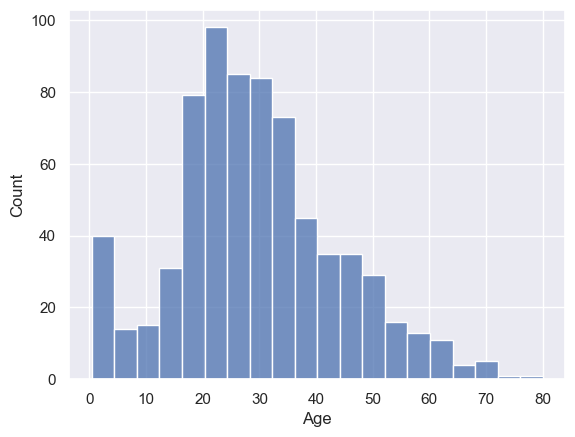

In [7]:
# Histogram of the Age variable
sns.histplot(df["Age"])

The above code is also equivalently written as

<Axes: xlabel='Age', ylabel='Count'>

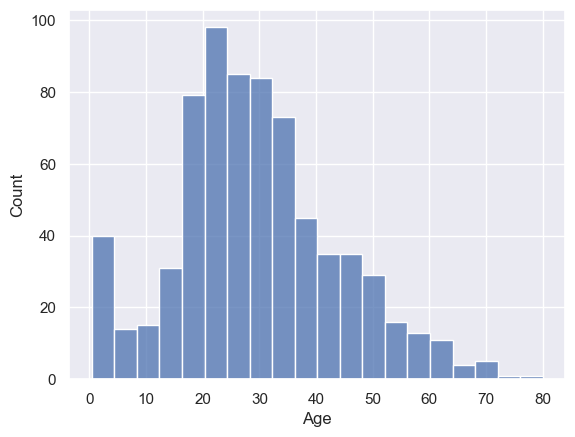

In [10]:
sns.histplot(data=df, x="Age")

This is the most common syntax in seaborn: the first argument of a plotting function is the dataframe which stores the data of interest, then the next two arguments are `x` and `y`, describing which dataframe columns should appear on the x and y axes of the plot. For a histogram we only need to specify the x-axis.

A good habit is to always add axis labels to your plots. You can achieve this easily in seaborn:

Text(0, 0.5, 'Frequency')

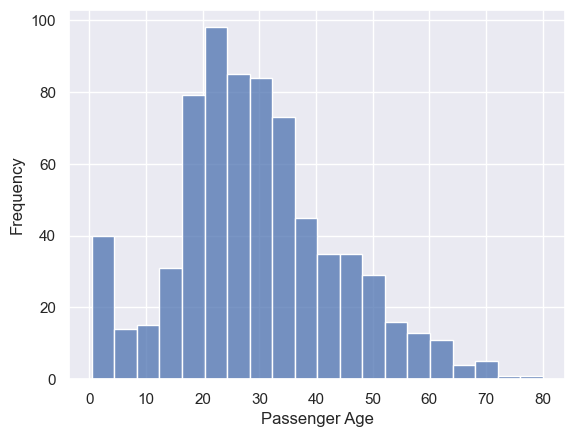

In [11]:
p = sns.histplot(data=df, x="Age")
p.set_xlabel("Passenger Age")
p.set_ylabel("Frequency")

**One categorical feature**: with categorical features, we are often interested in how many samples there are in each unique value. We've seen that we can generate this number using `value_counts()`, but to plot this value as a barplot, it is also easy using a *countplot*:

<Axes: xlabel='Sex', ylabel='count'>

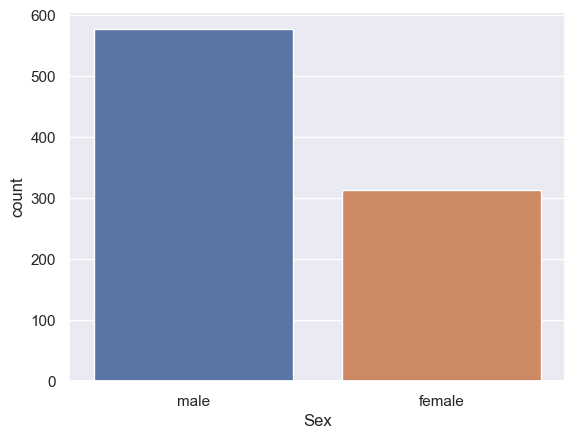

In [20]:
sns.countplot(data=df, x="Sex")

**Two Numerical Features**: When comparing two numerical features, probably the most standard apporach is to use a *scatterplot*:

Text(0, 0.5, 'Fare Price')

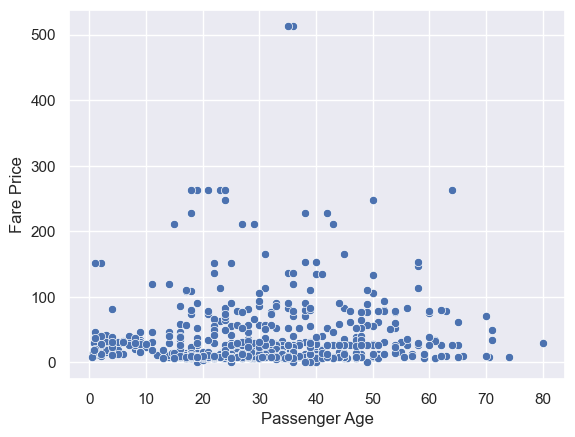

In [13]:
p = sns.scatterplot(data=df, x="Age", y="Fare")
p.set_xlabel("Passenger Age")
p.set_ylabel("Fare Price")

**One Numerical and One Categorical Feature**: a good option is a *boxplot*. A boxplot will show one "box and whisker" plot for each of the levels of the categorical variable. A boxplot shows the median, 25 and 75 percentiles, and outliers.

<Axes: xlabel='Embarked', ylabel='Age'>

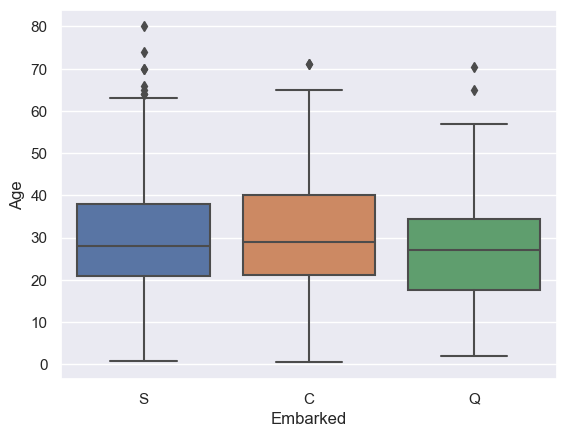

In [14]:
sns.boxplot(data=df, x="Embarked", y="Age")

Another very good approach is to use a *violinplot*, which combines a boxplot with a histogram, essentially plotting a histogram for data subsetted for each level of the cateogorical feature. As in a histogram, wider areas indicate more data points falling in that region.

<Axes: xlabel='Embarked', ylabel='Age'>

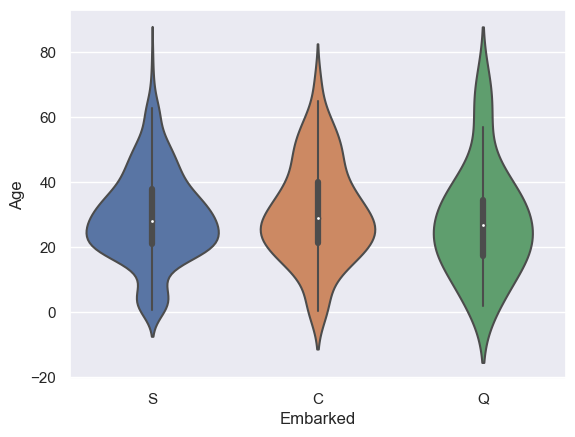

In [15]:
sns.violinplot(data=df, x="Embarked", y="Age")

**Subplots**: Often it is useful to display multiple plots together in one grid. This is easy to do using `plt.subplots`. 

<Axes: xlabel='Embarked', ylabel='Age'>

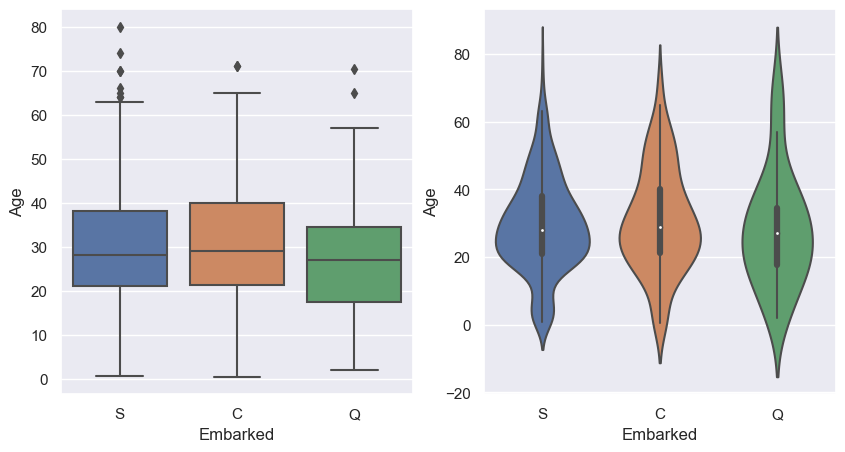

In [16]:
# Create a 1 x 2 grid of plots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Now use individual axes to make plots
sns.boxplot(data=df, x="Embarked", y="Age", ax=axes[0])
sns.violinplot(data=df, x="Embarked", y="Age", ax=axes[1])

**Using hue**: When we want to see the relationship between 3 different features, we don't want to make a 3D plot, because these are much harder to interpret on a screen. Instead, we often use the additional parameter *hue* to color our plot based on a third feature of interest. Below is an example of this using a scatterplot, but it can be done with lots of different plots.

<Axes: xlabel='Age', ylabel='Fare'>

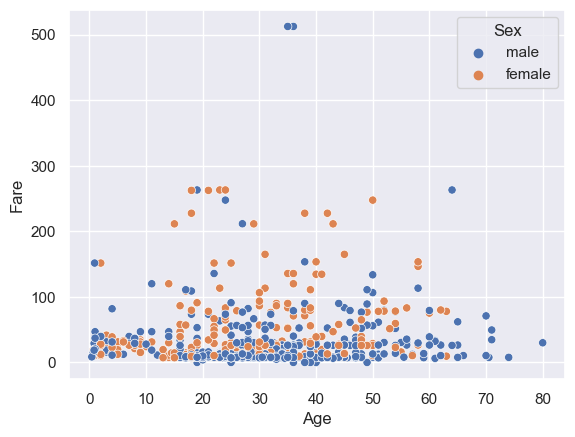

In [19]:
# Plotting age vs fare colored by Sex
sns.scatterplot(data=df, x="Age", y="Fare", hue="Sex")

We can also use the hue parameter to compare two categorical features using a colored countplot:

<Axes: xlabel='Sex', ylabel='count'>

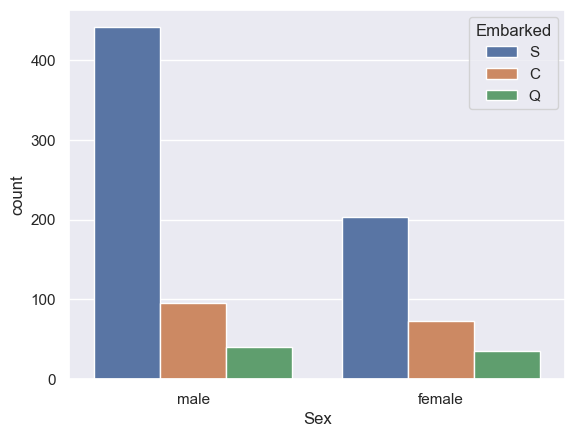

In [21]:
sns.countplot(data=df, x="Sex", hue="Embarked")

**Exercise**: Make the following plots. For each plot, you will need to determine what the appropriate type of plot is based on the feature types.

- Plot the distribution of fares.
- Plot the distribution of fares stratified (separated) by sex.
- Plot the distribution of age stratified by whether or not the passanger survived.
- Plot the distrubution of age stratified by whether or not the passenger survived for each of the embarked feature values.

<Axes: xlabel='Embarked', ylabel='Age'>

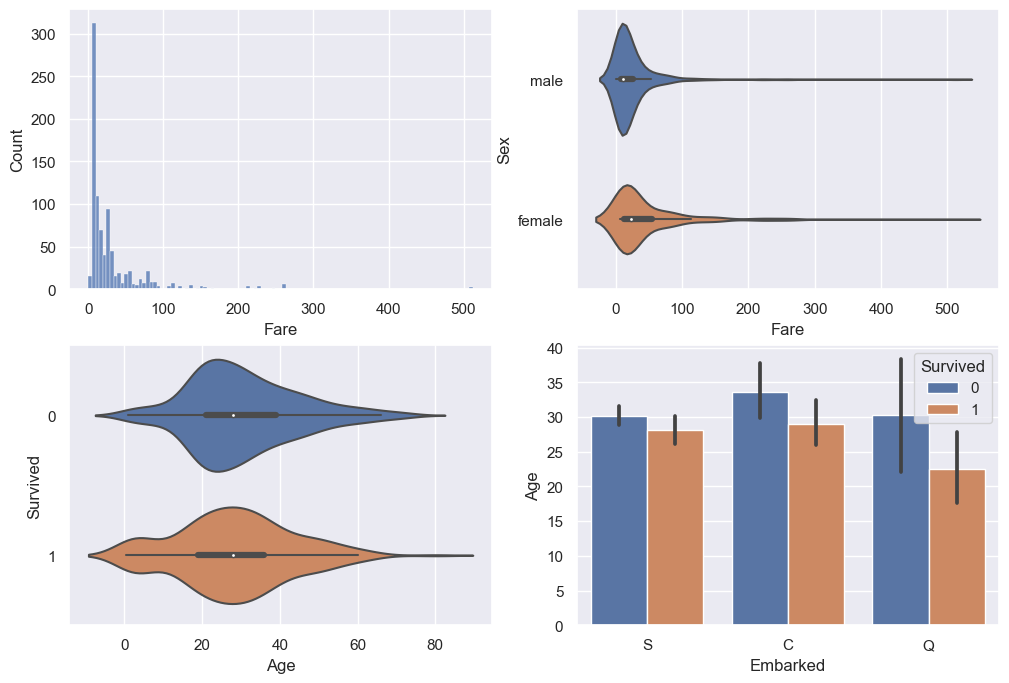

In [14]:
# Use subplots, though not required
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Distribution of fares
sns.histplot(data=df, x="Fare", ax=axes[0, 0])

# Distribution of fares for each sex
# Using violinplot, boxplot would also work
sns.violinplot(data=df, x="Fare", y="Sex", ax=axes[0, 1])

# Distribution of age by survived
df["Survived"] = df["Survived"].astype(str)
sns.violinplot(data=df, x="Age", y="Survived", ax=axes[1, 0])

# A few options for the last one. Here is one option using a barplot. Could also use several plots in a subplot.
sns.barplot(data=df, x="Embarked", y="Age", hue="Survived", ax=axes[1, 1])